# Lab 3: Radioactive Decay + Euler's Method

### References:
* Computational Physics, Second Edition, Giordano and Nakanishi
* Unit 28 - Workshop Physics Activity Guide

### Grading: 
We will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to use multiple files, please talk to me about how to make that work.

#### Version-0: 
Switch back to the Version-0 branch in labs to do this work.  Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 5:00pm, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * __Every function should have a docstring.__
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus. 

## Introduction
So far our work in computational physics has focused on calculating exact results using known formulas.  In class, we have just begun to discussion how numerical error can affect the outcome of the calculations of those exact results, particularly those due to rounding errors.  In Ch 5 we will discuss the __Algorithmic Errors__ that result when a programmer modifies a theoretical calculation so it may be solved with computational techniques.  We are going to start that process today with a familar problem, radioactive decay.  

As you learned in Workshop Physics, if we had a large sample of radioactive nuclei (an especially nasty example is $^{235}U$), the number of nuclei at any given time is governed by a first order differential equation: 

$$
\frac{dN}{dt} = -\lambda N(t) 
$$

where $N(t)$ describes the number of nuclei in the sample as a function of time, $t$, and $\lambda$ parameterizes the rate at which the nuclei decay.
Using the technique of separation of variables, this equation can be solved to yield:

$$
N(t) = N_0 e^{- \lambda t}
$$

Where $N_0$ is the number of nuclei at $t=0$s.

----------------------------------------------------------------------------
## Numerical Solutions of First Order Differential Equations
----------------------------------------------------------------------------
Any function may be expanded as a Taylor series.

$$
f(x) = \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}\,(x-a)^{n}
$$

where $f^{(n)}$ is the $n$-th derivative of the function $f(x)$.  More concretely the sum is:

$$
f(x) = f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots .
$$

Note that in each equation above, this is an infinite sum over all terms.  A common technique in physics is to truncate this series after a finite number of terms.  Indeed, most physics students first encounter this when studying the pendulum, during which we make the small angle approximation: $\sin{\theta}\approx\theta$.  This is a one-term Taylor series expansion of the $sine$ function.  Here is the $sine$ function expanded to 3 terms:

$$
\sin \left(x\right)\approx x-{\frac {x^{3}}{3!}}+{\frac {x^{5}}{5!}}-{\frac {x^{7}}{7!}}.\!
$$

In computational physics we can apply a Taylor expansion to solve differential equations.  This has two advantages, it is very computationally efficient, and it is possible to calculate numerical solutions of differential equations that have no analytic solution.  Since any function may undergo a Taylor expansion, let us expand a function named $N(t)$ - which so far we have not connected to our radioactive decay example .

$$
N(t) = N(t_0) + \frac{dN}{dt}\big |_{t=t_0} (t-t_0) + \frac{1}{2} \frac{d^2 N}{dt^2}\big |_{t=t_0} (t-t_0)^2 + \cdots
$$
Depending on the desired precision of our calculation, we may keep as many terms as we wish of the Taylor series.

#### If you wish to write the numerical solution as: 
$$
N(t) \approx N(t_0) + \frac{dN}{dt}\big |_{t=t_0} (t-t_0) 
$$
#### What quantity (t, t$_0$, dN, etc) must be small so that the higher order terms are zero?

$$
\Delta t = t-t_0.
$$

#### This same result may be calculated from an approximation using the definition of the derivative, as Newman does at the end of Ch 5.

This is an approximate result (thus the $\approx$) and we must consider carefully how to minimize the numerical error.  Since we wrote our numerical solution as one that holds while $\Delta t$ is small, we must stick with that.

Since we know the functional form of the derivative $ \frac{dN}{dt} = -\lambda N(t) $, we can insert that into our numerical equation: 

$$
N(t) \approx N(t_0) + (-\lambda N(t))\big |_{t=t_0} (t-t_0) 
$$

This is very useful!  It is what is called a map (which is NOT a continuous function) that discretizes the solution of the number of nuclei into a series of steps, separated by a time $\Delta t$.  Assuming we know the number of nuclei at a given time $N(t_0)$, we can use it to estimate $N$ at some later time $t_1$, assuming $t_1-t_0$ is sufficiently small.  Can you see where this is going?  Using our new number of nuclei at $t_1$, we can calculate the number at some later time $t_2 = t_1+\Delta t$.  If we continue on in this fashion, we can iterate to a solution for the number of nuclei at any arbitry multiple of $\Delta t$.

This approach is known as the *Euler* method, and I use it in my own research to study the dynamics of interacting particles.  It is not the only algorithm for solving differential equations numerically, but it is an excellent place to start.  We can also examine the numerical errors by comparing them to the exact analytic solution.

Let's simplify that function: 
$$
N(t) \approx N(t_0)  -\lambda N(t_0)~ (t-t_0) 
$$

## Lab Activities
1.  Numerically solve the differential equation and plot the data.

2.  On the same graph, plot the exact/analytic solution

3.  Format the plot and compare the two data sets.

4.  Be sure to play around with $\lambda$, $N_0$, and $\Delta t$.  
    a.  Find a set of conditions under which the match is very __good__ between numerical model and analytical model.
    
    b.  Find a set of conditions under which the match is very __poor__ between numerical model and analytical model.

5.  Consider a radioactive decay including two types of nuclei, A and B, with populations $N_A(t)$ and $N_B(t)$.  Suppose that type A nuclei decay to form type B nuclei, which then also decay according to: 

$$
\frac{dN_A}{dt} = -\lambda_A N_A(t) \\
\frac{dN_B}{dt} = \lambda_A N_A(t) - \lambda_B N_B(t) 
$$

where $\lambda_A$ and $\lambda_B$ are the decay parameters of each population of nuclei.  

   a.  Use the Euler method to solve these coupled equations as a function of time.
   
   b.  Explore the behavior found for various ratios of $N_{A0}/N_{B0}$ and $\lambda_A/\lambda_B$.  This is an opportunity to really start to play with the physics.  You should decide on some test cases you think will be interesting, run those test cases, and describe your results.  
   c.  Make a plot for each test case.
        
*Here you should work with a set of conditions where you expect the match between the analytical model and the numerical model is good, based on what you learned for the single population of nuclei.*
        
You are welcome to calculate an exact result for the two-species of nuclei, it is solvable, but this is not required. 
    

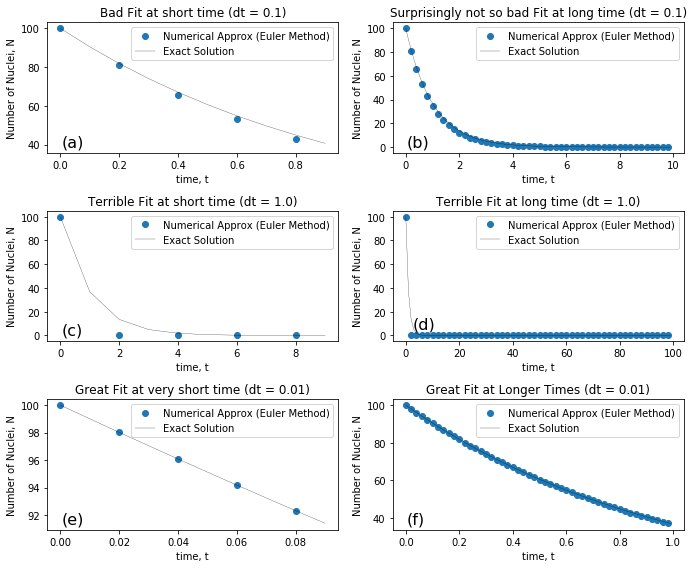

In [7]:
# Part 1: Numerically solve the Diff.E.Q. 
# dN/dt = -lambda N and compare to the analytic solution
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def analytic(N0,t,lambda1):
    '''Calculate the exact solution to dN/dt = -a N (derived above)
    
        inputs: 
        N0 = initial number of nuclei
        t = total time elapsed
        lambda = decay constant
        
        returns:
        N1 = N0 exp{-lambda*dt} 
        
    '''
    
    N1 = N0 * math.exp(-lambda1 *t)  #model number of nuclei at given time 
    return N1
    
def euler_equation(N0,dt,lambda1):
    '''Calculate the numerical solution to dN/dt = -a N
    
        inputs: 
        N0 = initial number of nuclei
        dt = timestep
        lambda = decay constant
        
        returns:
        N1 = N0 - lambda*N0 *dt (if N1>0, else returns 0)
    '''
    
    N1 = N0 - lambda1*N0 *dt  #numerical (euler) number of nuclei at given time
    if N1 > 0:                #unlike the numerical solution, the euler `map`
        return N1             #can reach numbers less that zero.  We don't want this
    else:
        return 0
    
def euler_solution(N0,lambda1,dt,t,N_timesteps,ax):
    '''
    Calculate the numerical solution of dN/dt - \lambda N 
    
    #reasonable choices for parameters:
    N0 = 100.0       #initialize number of nuclei
    lambda1 = 1      #decay constant - model value of 1 nuclei per time unit (nominally seconds)
    dt = .1          #timestep is 1/10 a time unit
    t=0.0            #start at the beginning
    N_timesteps = 50 #Run for N_timesteps*dt = 5 time units
    '''

    #lists for holding data, as labeled 
    N_euler = []          #numerical approx
    N_analytic = []       #exact solution to diff.e.q.
    t1=[]                 #linear time (independent variable)
    
    #add the t=0 step
    t=0.0
    N_euler.append(N0)    
    N_analytic.append(N0)
    t1.append(t)
    t += dt
    
    #now increment by a set number of timesteps    
    for i in range(1,N_timesteps):
                
        #store the information in the same line as the calculation
        t1.append(t)
        N_analytic.append( analytic(N0,t,lambda1) )
        N_euler.append( euler_equation(N_euler[i-1],dt,lambda1) )
        t += dt
        
    #plot is set up in the main function
    #but these are route/redundant calls, so I put them in this subroutine
    ax.set_xlabel("time, t")
    ax.set_ylabel("Number of Nuclei, N")
    ax.plot(t1,N_euler,"o", markevery=2, label="Numerical Approx (Euler Method)")
    ax.plot(t1,N_analytic,"-",linewidth=0.25,color="k", label="Exact Solution")
    plt.legend()
    return t1,N_analytic,N_euler

if __name__ == "__main__":
    
    #---------------------------------------------------
    #make the figure object for all plots
    #---------------------------------------------------
    fig = plt.figure(figsize=(10,8))
    
    #---------------------------------------------------
    #case 1, an okay fit - dt is not terribly small - 
    # look at short times
    #---------------------------------------------------
    N0 = 100.0       #initialize number of nuclei
    lambda1 = 1      #decay constant - model value of 1 nuclei per time unit (nominally seconds)
    dt = .1          #timestep is 1/10 a time unit
    t=0.0            #start at the beginning
    N_timesteps = 10 #Run for N_timesteps*dt = 5 time units

    ax = plt.subplot(321)
    ax.text(0.05,0.05,"(a)",transform=ax.transAxes,fontsize=16)
    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps,ax)    
    plt.title("Bad Fit at short time (dt = 0.1)")
    #---------------------------------------------------
    #same case 1, 
    # look at long times
    #---------------------------------------------------

    N_timesteps = 100 #Run for N_timesteps*dt = 50 time units
    ax = plt.subplot(322)
    ax.text(0.05,0.05,"(b)",transform=ax.transAxes,fontsize=16)
    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps,ax)    
    plt.title("Surprisingly not so bad Fit at long time (dt = 0.1)")

    #---------------------------------------------------
    #case 2, a poor fit - dt is large
    #---------------------------------------------------
    N0 = 100.0       #initialize number of nuclei
    lambda1 = 1      #decay constant - model value of 1 nuclei per time unit (nominally seconds)
    dt = 1.0          #timestep is 1/10 a time unit
    N_timesteps = 10 #Run for N_timesteps*dt = 5 time units

    ax = plt.subplot(323)
    ax.text(0.05,0.05,"(c)",transform=ax.transAxes,fontsize=16)
    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps, ax) 
    plt.title("Terrible Fit at short time (dt = 1.0)")
    
    #---------------------------------------------------
    #same case 2, 
    # look at long times
    #---------------------------------------------------
    N_timesteps = 100 #Run for N_timesteps*dt = 50 time units

    ax = plt.subplot(324)
    ax.text(0.07,0.1,"(d)",transform=ax.transAxes,fontsize=16)
    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps, ax) 
    plt.title("Terrible Fit at long time (dt = 1.0)")

    #---------------------------------------------------
    #case 3, a good fit - dt is quite small
    #---------------------------------------------------
    N0 = 100.0       #initialize number of nuclei
    lambda1 = 1      #decay constant - model value of 1 nuclei per time unit (nominally seconds)
    dt = .01          #timestep is 1/10 a time unit
    t=0.0            #start at the beginning
    N_timesteps = 10 #Run for N_timesteps*dt = 5 time units


    ax = plt.subplot(325)
    ax.text(0.05,0.05,"(e)",transform=ax.transAxes,fontsize=16)


    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps,ax)    
    plt.title("Great Fit at very short time (dt = 0.01)")

    #---------------------------------------------------
    #case 4, a good fit - take our good fit from case 3 and run over longer times
    #---------------------------------------------------
    N0 = 100.0       #initialize number of nuclei
    lambda1 = 1      #decay constant - model value of 1 nuclei per time unit (nominally seconds)
    dt = .01          #timestep is 1/10 a time unit
    t=0.0            #start at the beginning
    N_timesteps = 100 #Run for N_timesteps*dt = 5 time units


    ax = plt.subplot(326)
    ax.text(0.05,0.05,"(f)",transform=ax.transAxes,fontsize=16)

    t1,N_analytic,N_euler = euler_solution(N0,lambda1,dt,t,N_timesteps,ax)    
    plt.title("Great Fit at Longer Times (dt = 0.01)")


    plt.legend()
    plt.tight_layout()

## Analysis of the Simple Radioactive Decay 

In the plots above, we plot the Number of Nuclei, $N$, as a function of time.  Each plot  shows the predicted number of nuclei via two methods, the analytic solution to the differential equation (gray line) and the numerical solution computed with Euler's method equation (blue circles).  Each subplot explores a different combination of the input parameters.  Here we examine how well the numerical model matches the exact solution.

In all solutions above, $\lambda=1.0$, $N_0=100$.  We modify the timestep $\Delta t$, 
which was required to be small in order to derive the Euler method.  Thus each plot spans a different time range on the $t-$axis, since the panels on the left side are created with $N_{steps}=10$, while the panels on the right side are created with $N_{steps}=100$.  Thus the total time, $N_{steps}*\Delta t$, differs in each panel. 

In panel (a), the numerical model and the exact solution do not agree in 3 of the 5 points shown on the plot.  Here the timestep is large $\Delta t=0.1$.  However, in examining the same set of parameters at long time in panel (b), we see a small difference between the Euler and exact solution throughout the plotted region.

In panel (c), we plot an intentionally bad result, where the data and the analytic model disagree in the second timestep because the timestep is very large, $\Delta t = 1.0$.  Since the decay constant is also large, this result rapidly approaches zero and remains there - this is especially noticeable in panel (d) for the same set of parameters.

In panel (e) we plot an excellent fit with a timestep of $\Delta t = 0.01$.  Here the numerical data and the analytic model appear to overlap for all plotted times.  This is also true in panel (f) with the same set of parameters, run for a longer number of steps.

Overall this gives us a visual sense of the timesteps that produce good numerical results.  We can use $\Delta t = 0.1$ for fast calculations, but should reduce the timestep by an order of magnitude for good results.  __We could further analyze the error by taking the difference between the data and the analytic model, but you were not asked to do so for this lab.__

## The coupled radioactive decay equation:
Consider a radioactive decay including two types of nuclei, A and B, with populations $N_A(t)$ and $N_B(t)$.  Suppose that type A nuclei decay to form type B nuclei, which then also decay according to: 

$$
\frac{dN_A}{dt} = -\lambda_A N_A(t) \\
\frac{dN_B}{dt} = \lambda_A N_A(t) - \lambda_B N_B(t) 
$$

where $\lambda_A$ and $\lambda_B$ are the decay parameters of each population of nuclei.  

   a.  Use the Euler method to solve these coupled equations as a function of time.
   
   b.  Explore the behavior found for various ratios of $N_{A0}/N_{B0}$ and $\lambda_A/\lambda_B$.  This is an opportunity to really start to play with the physics.  You should decide on some test cases you think will be interesting, run those test cases, and describe your results.  
   c.  Make a plot for each test case.
        
*Here you should work with a set of conditions where you expect the match between the analytical model and the numerical model is good, based on what you learned for the single population of nuclei.*
        
You are welcome to calculate an exact result for the two-species of nuclei, it is solvable, but this is not required. 

--------------------------------------------------------
## Solution
The numerical and analytic solutions to $\frac{dN_A}{dt} = -\lambda_A N_A(t)$ are identical to that in part 1.  Calculating the numerical solution to 

$$
\frac{dN_B}{dt} = \lambda_A N_A - \lambda_B N_B
$$
follows a very similar set of steps.  As in $\frac{dN_A}{dt}$ we 
Taylor expand $N_B(t)$ to two terms:
$$
N_B(t+\Delta t) = N_B(t) + \frac{dN_B}{dt}\Delta t
$$

Plug in the exact differential equation for $\frac{dN_B}{dt}$: 
$$
N_B(t+\Delta t) = N_B(t) + (\lambda_A N_A - \lambda_B N_B)\Delta t
$$
And that is it.  We can write a numerical solution by iterating through many timesteps.
The analytic result was derived in class.  Here I quote that result:

$$
N_B(t) = \frac{N_{A0}}{(\lambda_B/\lambda_A-1)}~e^{-\lambda_At} + 
         \big( N_{B0} - \frac{N_{A0}}{(\lambda_B/\lambda_A-1)}\big)~ e^{-\lambda_Bt}
$$
This is solved with an integrating factor, the matrix method (or guess and check).  Note that this model doesn't work when $\lambda_A = \lambda_B$.  In that case the differential equation has a different solution.  

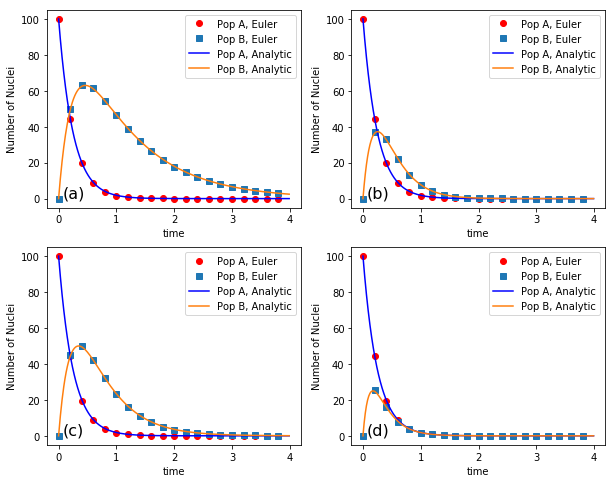

In [15]:
def analytic_AB(NA0,NB0,t,lambdaA,lambdaB):
    '''Calculate the exact solution to dNB/dt = + lambda_a N - lambda_b N
    
        inputs: 
        NA0 = initial number of nuclei of type A
        NB0 = initial number of nuclei of type B

        t = total time elapsed
        lambdaA = decay constant of type A
        lambdaB = decay constant of type B
        
        returns:
        N1 = number of nuclei at a given time
        
    '''
    #note model doesn't work when \lambdaA = \lambdaB, 
    # so don't calculate anything for that
    
    if abs(lambdaA-lambdaB) > 10e-8: 
        NA = NA0 * math.exp(-lambdaA *t)
        NB = NA0*math.exp((-lambdaA)*t)/(lambdaB/lambdaA-1) + (NB0 - NA0/(lambdaB/lambdaA-1) )* math.exp(-lambdaB*t)
        return NA,NB
    else:
        return 0,0
    
def euler_AB(NA0,NB0,dt,lambdaA,lambdaB):
    '''Calculate the numerical solution to coupled radioactive decay
    
        inputs: 
        NA0 = initial number of nuclei of type A
        NB0 = initial number of nuclei of type B

        t = total time elapsed
        lambdaA = decay constant of type A
        lambdaB = decay constant of type B
        
        dt = timestep
  
        returns:
        N1 = euler model for number of nuclei at a given time
    '''
    #number of A nuclei at time t
    NA1 = NA0 - lambdaA *NA0 *dt
    
    #number of B nuclei at time t
    NB1 = NB0 + (lambdaA *NA0 - lambdaB *NB0) *dt

    #as before, we can't have negative nuclei, so just zero it 
    if NA1 < 0: 
        NA1 = 0
    if NB1 < 0:
        NB1 = 0
    
    return NA1,NB1
    
def solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax):
    '''Given the parameters, solve/plot the coupled radioactive decay system
    
    inputs
    NA0 = #initial number of A type nuclei
    NB0 = #initial number of B type nuclei
    lambdaA = #decay constant A
    lambdaB = #decay constant B
    dt = #timestep
    t =  #inital time
    N_timesteps = #number of steps to calculate the solution
    #-----------------------------------------
    '''
    
    NA_euler = []      #pop.A numerical solution
    NA_analytic = []   #pop.A analytic solution
    t1=[]              #time 

    NB_euler = []      #pop.B numerical solution
    NB_analytic = []   #pop.B analytic solution
    
    #do the t=0 timestep, initialize all populations
    t=0
    NA_euler.append(NA0)
    NA_analytic.append(NA0)
    NB_euler.append(NB0)
    NB_analytic.append(NB0)
    
    t1.append(t)
    t += dt
    
    #iterate the solution
    for i in range(1,N_timesteps):
        t1.append(t)
        
        #initial number of nuclei for this time step
        NA_n = NA_euler[i-1]
        NB_n = NB_euler[i-1]

        #new number of nuclei - euler
        NA1, NB1 = euler_AB(NA_n,NB_n,dt,lambdaA,lambdaB)        
        
        #store the information
        NA_euler.append(NA1)
        NB_euler.append(NB1)
        
        #new number of nuclei - analytic
        NA1, NB1 = analytic_AB(NA0,NB0,t,lambdaA,lambdaB)
        
        #store the information
        NA_analytic.append(NA1)
        NB_analytic.append(NB1)

        t += dt #increment the time
        
    #plot the data on the given axes object (ax)
    ax.plot(t1,NA_euler,"o", markevery=20,color='red',label="Pop A, Euler")
    ax.plot(t1,NB_euler,"s", markevery=20,label="Pop B, Euler")

    ax.plot(t1,NA_analytic,"-",color='blue',label="Pop A, Analytic")
    ax.plot(t1,NB_analytic,"-",label="Pop B, Analytic")
    ax.set_xlabel("time")
    ax.set_ylabel("Number of Nuclei")
    ax.legend()
        
#-----------------------------------------
#modify lambdaA/lambdaB
#-----------------------------------------
if __name__ == "__main__":
 
    #-----------------------------------------
    #case 1
    NA0 = 100.0     #number of A
    NB0 = 0.0       #number of B
    lambdaA = 4.0
    lambdaB = 1.0    
    dt = .01           #keep the 'good' timestep
    N_timesteps = 400  #run for a longer than before
    #-----------------------------------------
    
    fig = plt.figure(figsize=(10,8))

    ax = plt.subplot(221)
    ax.text(0.06,0.05,"(a)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 2
    lambdaB = 3.9
    ax = plt.subplot(222)
    ax.text(0.06,0.05,"(b)",transform=ax.transAxes,fontsize=16)

    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 3
    NA0 = 100.0     #100.0
    NB0 = 0.0       #100.0
    lambdaB = 2.0    

    ax = plt.subplot(223)
    ax.text(0.06,0.05,"(c)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 4
    NA0 = 100.0     #100.0
    NB0 = 0.0       #100.0
    lambdaB = 8.0    

    ax = plt.subplot(224)
    ax.text(0.06,0.05,"(d)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)

## Analysis of Coupled System

Here we plot the number of nuclei as a function of time for both populations of nuclei. The exact solution for population A is shown as a blue line, that of B is shown as an orange line.  The numerical solution is shown as red dots for population A and gray squares for population B.  

Each plot contains the same curve for population A.  The initial number of nuclei, $N_{A0}=100$, $N_{B0}=0$, the timestep is fixed at $\Delta t = 0.01$, and the decay rate for population A is $\lambda_A = 4.0$.  Each panel contains a variation in the $\lambda_B$ parameter for population B, with the same timestep.  The behavior of the A nuclei is identical to the simple case, since it may only decay as governed by the $dN_A/dt = - \lambda_A dN_A$.  Note that once $N_B > N_A$, it remains so for all times as predicted by the model.

In panel (a) we plot the case where $N_{B0}=0$ and $\lambda_B= 1.0 = \lambda_A/4$.  Here we see the number of B nuclei increased as A decays - as expected from the model.  Here $N_B(t)$ rapidly increases, peaks at $t\approx 0.5$, and then slowly decays as $N_A(t) \rightarrow 0$.

In panel (b) we plot the case where $\lambda_B=3.9=0.975\lambda_A$.  Here the qualitative behavior is similar to the $N_{B0}=0$ case, but the B population decays much more rapidly, peaking at $t \approx 0.25$ and decaying rapidly.

In panel (c) we plot the case where $\lambda_B= 2.0 = \lambda_A/2$.  Here we see that by doubling the $\lambda_B$ value from the previous examples, the number of nuclei B decreases at a more rapid rate.  The curve has the same qualitative shape as previously, with a peak approximately the same time as panel (a).

In panel (d) we plot the case where $\lambda_B= 8.0 = 2 \lambda_A$.  Here the decay rate of nuclei B is large - and $N_B \le N_A$ for all times.  After $t=1$, any B nuclei produced by A decays immediately, keeping both A and B populations near zero. 

Further analysis should include tuning $N_{A0}/N_{B0}$.  See next section.  

It would also be interesting to measure the peak of the B curve, and plot $\lambda_B/\lambda_A$ vs. $t_{peak}$.  From the differential equation we would expect this is the point where $\frac{dN_B}{dt}=0$, so $\lambda_A N_A = \lambda_B N_B$, and we could check if that is so.  Again, not assigned.

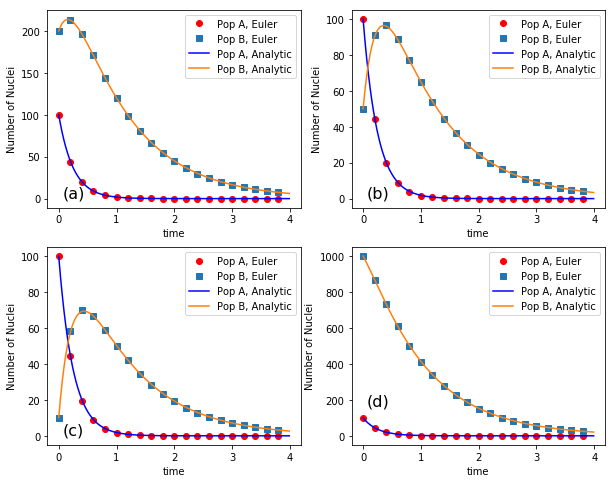

In [10]:
#-----------------------------------------
#modify N_A0/N_B0
#-----------------------------------------
if __name__ == "__main__":
 
    #-----------------------------------------
    #case 1
    NA0 = 100.0     #number of A
    NB0 = 200.0       #number of B
    lambdaA = 4.0
    lambdaB = 1.0    
    dt = .01           #keep the 'good' timestep
    N_timesteps = 400  #run for a longer than before
    #-----------------------------------------
    
    fig = plt.figure(figsize=(10,8))

    ax = plt.subplot(221)
    ax.text(0.06,0.05,"(a)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 2
    NA0 = 100.0     #100.0
    NB0 = 50.0       #100.0
    ax = plt.subplot(222)
    ax.text(0.06,0.05,"(b)",transform=ax.transAxes,fontsize=16)

    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 3
    NA0 = 100.0     #100.0
    NB0 = 10.0       #100.0

    ax = plt.subplot(223)
    ax.text(0.06,0.05,"(c)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)
    
    #-----------------------------------------
    #case 4
    NA0 = 100.0     #100.0
    NB0 = 1000.0       #100.0

    ax = plt.subplot(224)
    ax.text(0.06,0.2,"(d)",transform=ax.transAxes,fontsize=16)
    solve_and_plot_AB(NA0,NB0,lambdaA,lambdaB,dt,N_timesteps,ax)

## Analysis of Coupled System - part 2

Here the graphs have the same basic description as the previous plot.
Each panel contains the same curve for population A.  The initial number of nuclei, $N_{A0}=100$, the timestep is fixed at $\Delta t = 0.01$, and the decay rate is $\lambda_A = 4.0$.  Each panel contains a variation in the parameter $N_{B0}$ for population B, with the same timestep.  The behavior of the A nuclei is identical to the simple case, since it may only decay as governed by the $dN_A/dt = - \lambda_A dN_A$.  Note that once $N_B > N_A$, it remains so for all times as predicted by the model.

In panel (a) we plot $N_{B0} = 2N_{A0}$ and note that B population peaks almost immediately.  In panel (b) $N_{B0} = N_{A0}/2$, so we see population B increase, peak and decay as usual.  Similar behavior occurs in (c) where $N_{B0} = N_{A0}/10$.  Finally in (d) we plot $N_{B0} = 10 N_{A0}$.  Here we see no peak in population B - it decreases exponentially with no apparent contribution from population A.

## Extra Question - Fitting Real Data - Question Cut for Time

####  Radioactive Decay Data Source: 
[Comlab](http://www.pef.uni-lj.si/eprolab/comlab/) - [Radioactive Decay Lab](http://www.pef.uni-lj.si/eprolab/comlab/sttop/sttop-is/TG/Radiation/Decay.htm#Experimental%20data) 

Plot and fit the data in radioactive.csv.  Find the half-life of the substance.

Half-life is:  85.7453866159 s


/Users/mcde2235/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


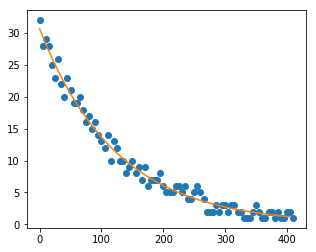

In [21]:
##real data:
from scipy.optimize import curve_fit

def exp_fit_func(x,a,b):
    return a*np.exp(-b*x)
    
data = np.loadtxt(open( "radioactive.csv", "r"),delimiter=",", skiprows=1)
time = data[:,0]
N_expt = data[:,1]

#t3=np.linspace(0,10,100)
#y3=2.0*m

parameters, covariance = curve_fit(exp_fit_func,time,N_expt)
print("Half-life is: ", np.log(2.0)/parameters[1], "s")
N_fit = exp_fit_func(time, *parameters) 
#print(N_fit)
fig1 = plt.figure(figsize=(5,4))

ax1 = plt.subplot(111)
ax1.plot(time,N_expt,"o")
ax1.plot(time[0:-1],N_fit[0:-1],"-")



The half-life value found using the graph count rate vs. time is about 80 s. The theoretical value of the half-life for protactinium 234 is 70.5 s.